# 逻辑回归 

## 1 逻辑函数sigmod

import numpy as np 
<br>
已知 x = np.arange(-50,51)
<br>
请定义sigmod函数, 利用sigmod函数，生成数组y，y的元素为x的每个元素的sigmod函数值。
<br>
绘制x，y折线图

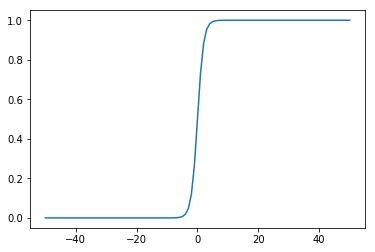

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def sigmod(x):
    return 1/(1+np.exp(-x))
x = np.arange(-50,51)
y = [sigmod(item) for item in x ]
plt.plot(x, y)
plt.show()
    

## 2 鉴别男女
<br>
列表x为记录的男生女生身高（cm）和体重（kg），列表y为对应列表x的男女类别。
<br>
x = [ [158, 64], [170, 86], [183, 84], [191, 80], [155, 49], [163, 59], [180, 67], [158, 54], [170, 67] ]
<br>
y_labels = ['男', '男', '男', '男', '女', '女', '女', '女', '女']

x_test为测量的4人的身高和体重，利用逻辑回归模型LogisticRegression，预测其性别，并输出结果。
<br>
x_test = [  [168, 65],  [180, 96],  [160, 52],  [169, 67] ]
<br>

In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import LabelBinarizer
x = [ [158, 64], [170, 86], [183, 84], [191, 80], [155, 49], [163, 59], [180, 67], [158, 54], [170, 67] ]
y_labels = ['男', '男', '男', '男', '女', '女', '女', '女', '女']
lb = LabelBinarizer()
x_train = np.array(x)
y_train = lb.fit_transform(y_labels)
knn = LogisticRegression()
knn.fit(x_train, y_train)
x_test = [ [168, 65], [180, 96], [160, 52], [169, 67] ]
x_test = np.array(x_test)
pre_test = knn.predict(x_test)
pre_labels = lb.inverse_transform(pre_test)
print(f'预测标签:{pre_labels}' )

预测标签:['女' '男' '女' '女']


C:\Users\chenyouguang\.conda\envs\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chenyouguang\.conda\envs\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 鸢尾花分类器

## （1）加载鸢尾花数据
<br>
使用datasets.load_iris加载鸢尾花数据集
<br>

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

loaded_data = datasets.load_iris()
data_X = loaded_data.data
data_y = loaded_data.target

## （2）将数据集划分为两部分，训练数据集和测试数据集，测试数据集占总的数据集的0.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)


## （3） 建立LogisticRegression模型，并训练

In [7]:
model = LogisticRegression()
model.fit(X_train,y_train) 

C:\Users\chenyouguang\.conda\envs\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chenyouguang\.conda\envs\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## （4） 利用训练好的模型预测x_test, 并输出预测结果与真实值的正确率、精确率、召回率和F1-score (注意，设置精确率、召回率和F1的函数参数average='micro')

In [9]:
y_pred = model.predict(X_test)
A = metrics.accuracy_score(y_test, y_pred)
print(f'正确率: {A}')
P = metrics.precision_score(y_test, y_pred, average='micro')
print(f'精确率: {P}')
R = metrics.recall_score(y_test, y_pred,average='micro')
print(f'召回率: {R}' )
f1 = metrics.f1_score(y_test, y_pred, average='micro')
print(f'F1 score: {f1}' )

正确率: 0.9666666666666667
精确率: 0.9666666666666667
召回率: 0.9666666666666667
F1 score: 0.9666666666666667
